- Student should be able to Recognize when unsupervised learning is necessary, and select and apply appropriate clustering techniques

# Machine Learning (Overview)

How do you know what kind of Machine Learning that you're doing? What algorithm should you pick? 

This decision is driven driven by:

1) The attributes of your dataset

2) What you want to predict

- ## Supervised Learning: 
Supervised Learning is used when training data outputs are labelled. The output is the thing that you're trying to predict.
  - ### Classification
  Classification algorithms try to predict the correct category (or class) from a given set of categories.
  - ### Regression
  Regression algorithms predict a continuous or semi-continuous value. (Not to be confused with _Linear_ Regression)
-  ## Unsupervised Learning
  - ### Clustering
  Identifying groupings of related observations. This is our topic for today!
  - ### Dimensionality Reduction
  Takes a high-dimensionality dataset and reduces the number of variables taken into consideration via methods of feature selection and feature extraction.
  - ### Association Rule Learning
  Association is a method of discovering relationships between observations in a dataset. (between ovservations or features, not just relationships between explanatory variables and a single output variable. )
- ## Reinforcement Learning
  A form of machine learning where an "agent" interacts with its environment and is rewarded for correct behavior and penalized for incorrect behavior. Over many iterations the agent learns the behavior that results in the greatest reward and smallest punishment. 

##Memorize This!

**Supervised**: Labelled outputs
- **Classification**: Discrete output cagetories
- **Regression**: Continuous output values

**Unsupervised**: Outputs are not labelled

**Reinforcement**: Rewards/punishments for "behaviors"

# Examples

/polly "I know what Kaggle is." "Yes" "No"

/polly "I have made a submission to a Kaggle competition before." "Yes" "No"

Show some kaggle datasets and show how the training data has labels but the testing data does not.

## [Classification Examples](https://github.com/ShuaiW/kaggle-classification)

 - Think Titanic Dataset

## [Regression Examples](https://github.com/ShuaiW/kaggle-classification)

- Think Home Price Prediction

## [Unsupervised Learning Examples](http://www.lsi.upc.edu/~bejar/apren/docum/trans/09-clusterej-eng.pdf)

- Think Iris Dataset (clustering)

# ML Cheat Sheets

![Microsoft Cheat Sheet](https://docs.microsoft.com/en-us/azure/machine-learning/studio/media/algorithm-cheat-sheet/machine-learning-algorithm-cheat-sheet-small_v_0_6-01.png)

![PerceptionBox Cheat Sheet](https://perceptionbox.io/blog/content/images/2018/10/Machine-learning-algorithms-cheat-sheet.png)

This one does not group them by supervised, unsupervised, regression, classification, etc. But it gives you an idea of the different families of algorithms.

![Algorithm Map](https://jixta.files.wordpress.com/2015/11/machinelearningalgorithms.png?w=816&h=521&zoom=2)


# Clustering 

https://www.youtube.com/watch?v=DLfh8pv4-yQ

Clustering falls into the category of unsupervised learning. This is because there is nothing in our training data that designates the correct cluster that a data point should belong to beforehand. In fact, there's not even a "correct" _**number**_ of clusters to assign our points to. We will discuss some heuristics for choosing an **appropriate** number of clusters, but this (as in much of data science) is an area where there is no cut and dry right and wrong answer. 

Remember: "All models are wrong, but some models are useful." Data science is all about acknowledging where your model might be wrong while still pursuing something useful. 

## Why Clustering?

Clustering answers questions about how similar or dissimilar our "data objects" are. Clustering is one of the most effective methods for summarizing datasets with this question in mind. Clustering can be thought of as a sort of "unsupervised classification." You will likely never deploy a clustering model to a production environment, they're too unreliable. Clustering is more useful as a tool for data exploration than a model for making predictions. 

## “Clustering isn’t hard—it’s either easy, or not interesting”

If a good clustering exists, then it usually can be efficiently found. Clustering is the most difficult when clear clusters don't exist in the first place. In that case you should question whether or not clustering is the most appropriate or useful method. 

The purpose of clustering is to group data points that are similar along certain specified dimensions (attributes). "Similarity" is defined as the points being close together in some n-dimensional space. 

The greater the number of dimensions, the more difficult clustering becomes because the increase in dimensions makes all points this is because measures of distance are used to determine similarity between datapoints, and the greater the dimensionality the more all points become roughly equidistant with one another. (We don't have time to go further into this or demonstrate this, but clustering suffers from performance and interpretability issues in a high number of dimensions). Some of these challenges can be rectified by choosing an appropriate measure of "distance" between data points. For example, using clustering for document analysis is still fairly effective even though the analysis is of a highly-dimenaional space. 

Choosing the appropriate clustering method
Choosing appropriate dimensions to cluster along. 
Choosing a distance measure
Choosing an appropriate k (# of clusters)




# Types of Clustering:

## Hierarchical:

  - Agglomerative:
  
  - Divisive:

## Point Assignment:
  - 



Agglomerative



Clustering is HARD! In two dimensions with small amounts of data (how it's usually taught/demonstrated) it's trivial. But real-world examples get challenging really fast.


Applications:

SkyCat
Sloan Digital Sky Survey

Grouping Documents






There are a lot of clustering algorithms. YOU DON'T NEED TO BE ABLE TO CODE ALL OF THEM FROM SCRATCH IN ORDER TO APPLY THEM OR EVEN TO UNDERSTAND THEM. FOCUS ON LEARNING THINGS WITHIN THE CONTEXT OF A PROBLEM YOU ARE TRYING TO SOLVE AND ONLY LEARN THOSE THINGS THAT WILL HELP YOU SOLVE THE PROBLEM. 



Distance Measures


# K-Means Clustering

![K-means Clustering](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ea/K-means_convergence.gif/440px-K-means_convergence.gif)

Given a set of points in n-dimensional space we want to :

1) select k random points to act as initial centroids (one point for each cluster)

2) Find the cluster of points surrounding that centroid (assign points to the centroid that they lie closest to)

3) Calculate a new centroid for the cluster

Repeat steps 2 & 3 until the model converges. (Clusters don't change)

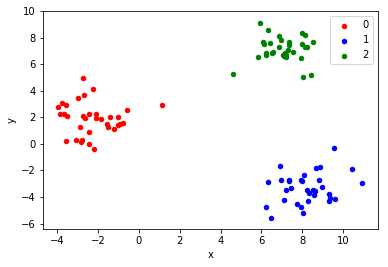

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs

# Create dataframe of x, y and label values
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()             

In [25]:
'''Sklearn gives us a labeled dataset. But we won't be using the labels in our 
clustering or else it wouldn't be unsupervised learning''' 

df.head()

,x,y,label
0,8.149047,7.271869,2
1,4.602984,5.271916,2
2,9.312147,-3.781517,1
3,10.439043,-1.930575,1
4,6.944744,7.826033,2


In [53]:
# Lets remove the labels so that you don't get confused
points = df.drop('label', axis=1)
points.head()

,x,y
0,8.149047,7.271869
1,4.602984,5.271916
2,9.312147,-3.781517
3,10.439043,-1.930575
4,6.944744,7.826033


## Linear Separability
The 2D blobs below are what is called "linearly separable" Meaning that we could use straight lines to separate them with no errors. This is the most trivial case of of k-means clustering, but it will help us to demonstrate.

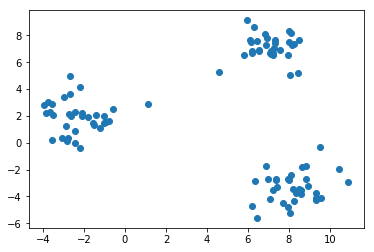

In [54]:
# Plot them without labels
plt.scatter(points.x, points.y)
plt.show()

# Re-review steps of the algorithm

Given a set of points in n-dimensional space we want to:

1) select k random points to act as initial centroids (one point for each cluster)

2) Find the cluster of points surrounding that centroid (assign points to the centroid that they lie closest to)

3) Calculate a new centroid for the cluster

Repeat steps 2 & 3 until the model converges. (Clusters don't change)

## Calculating the Centroid

K-means clustering is what's known as a centroid-based clustering algorithm. A centroid is an imaginary point located at the average location of all of the points in a given cluster. For example, if I wanted to find the centroid of all of the points in the above graph I would just calculate the average of the dataset's x-coordinates to find the x value of the centroid, and the average of the dataset's y-coordinates to find the y value of the centroid.

If we plot the centroid on the graph you'll see that it lies in the middle of the points. You could imagine the centroid as if it is the center of gravity, or center of mass for a given cluster. Since in this example we're treating all of the points in the dataset as if they're in the same cluster, it will end up somewhere in the middle. We're just doing this to demonstrate what a centroid is. The K-means algorithm doesn't ever calculate the centroid for the entire dataset.

In [55]:
# Calculate x and y values of centroid
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

4.268578241198131 1.9000321912691576


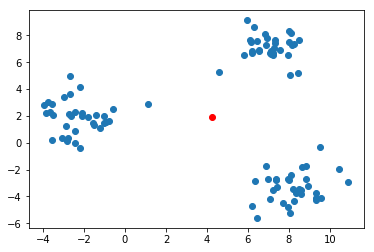

In [56]:
# Plot with centroid included
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

## How many centroids = K-means 

Since the centroid is the mean of a cluster the number of centroids to choose is the most important decision to make in "k-means" clustering. The K value is the number of centroids.


### The Eyeball Method
/polly "How many centroids should we use for this exercise?"

Congratulations, you've just been introduced to the first method of _**picking k**_ - Just graph your points and pick a number that makes sense. This gets a lot harder once you get a dimensionality higher than 3, but... Didn't we learn about some way to take high dimensional data and turn it into 2 or 3 dimensions...? 😀



## 3-means clustering

Lets pick k=3 and start demonstrating how this algorithm actually works algorithm rolling. 

The k-means algorithm works by picking 3 of the actual datapoints at random (in the simplest case) and treating those as the starting centroids. Using those centroids, 3 clusters are calculated.

We then use the new clusters and calculate a new centroid for each of them. Then, using those centroids we re-cluster. We perform this process over and over again until our clusters stabilize and the centroids stop moving. Lets demonstrate.

In [57]:
# Lets pick random observations to serve as our inital centroids
centroids = points.sample(3)

centroids.head()

,x,y
33,-3.851472,2.227081
72,8.105227,8.190898
75,7.946687,6.507723


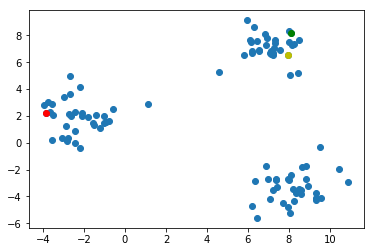

In [58]:
# Show where these points are
# ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "og")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [59]:
import math
import numpy as np

# Calculate the Nearest Centroid to each data point

def find_nearest_centroids(df, centroids, iteration):

  # List to store the indices of the centroids (For coloring purposes)
  nearest_centroids = []
  
  for index, point in df.iterrows():
    
    distances = []
    
    # Calculate Distance from each point to each centroid
    for index, centroid in centroids.iterrows():
      dist = math.sqrt((point.x - centroid.x)**2 + (point.y - centroid.y)**2)
      distances.append(dist)
#       print(distances)
      
    # find the index of the smallest distance
#     print(np.argmin(distances))
    nearest_centroids.append(np.argmin(distances))
    
    
  se = pd.Series(nearest_centroids)
  df['clusters_'+iteration] = se.values
  return df
    
first_pass = find_nearest_centroids(points, centroids, "1")
first_pass.head()

,x,y,clusters_1
0,8.149047,7.271869,2
1,4.602984,5.271916,2
2,9.312147,-3.781517,2
3,10.439043,-1.930575,2
4,6.944744,7.826033,1


In [60]:
points.shape, centroids.shape

((100, 3), (3, 2))

In [61]:
from scipy.spatial import distance
def find_nearest_centroid_1(df, centroids,iteration):
   
    distances = distance.cdist(df, centroids, 'euclidean')
    nearest_centroids = np.argmin(distances, axis =1)
    se = pd.Series(nearest_centroids)
    df['cluster_'+iteration] = se.values
    return df
first_pass = find_nearest_centroid_1(points, centroids,"1")

ValueError: XA and XB must have the same number of columns (i.e. feature dimension.)

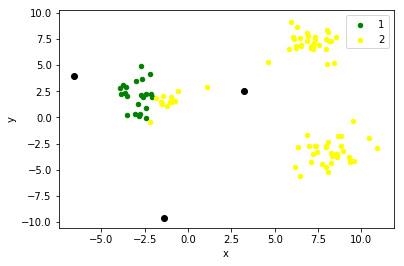

In [31]:
# scatter plot, dots colored by class value
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'clusters_1', centroids)

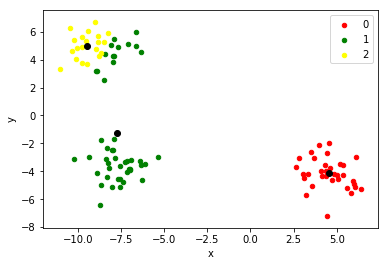

In [12]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids
#   df.y.groupby(column_header).mean()
#   grouped.head()
  
centroids = get_centroids(first_pass, 'clusters_1')

second_pass = find_nearest_centroids(first_pass, centroids, "2")

# scatter plot, dots colored by class value
colors = {0:'red', 1:'green', 2:'yellow'}
# fig, ax = plt.subplots()
# grouped = first_pass.groupby('clusters_1')
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
# plt.show()

plot_clusters(first_pass, 'clusters_1', centroids)

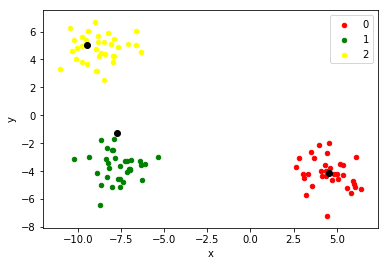

In [13]:
# Calculate new centroids
centroids = get_centroids(first_pass, 'clusters_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroids(first_pass, centroids, "2")

# Plot new Clusters
plot_clusters(second_pass, 'clusters_2', centroids)

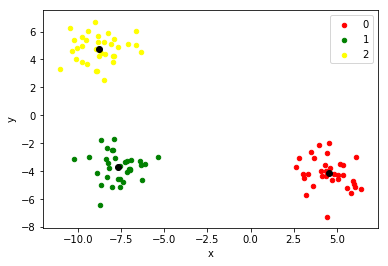

In [14]:
# Calculate new centroids
centroids = get_centroids(second_pass, 'clusters_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroids(second_pass, centroids, "3")

# Plot new Clusters
plot_clusters(third_pass, 'clusters_3', centroids)

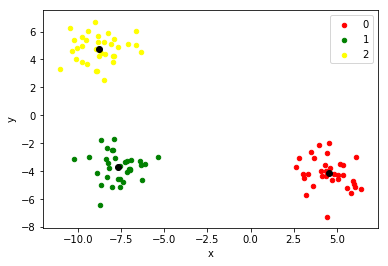

In [15]:
# Calculate new centroids
centroids = get_centroids(third_pass, 'clusters_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroids(third_pass, centroids, "4")

# Plot new Clusters
plot_clusters(fourth_pass, 'clusters_4', centroids)

In [16]:
convergence = np.array_equal(fourth_pass['clusters_3'], fourth_pass['clusters_4'])

print(convergence)

True


## Lets use a library to do it: Scikit-Learn

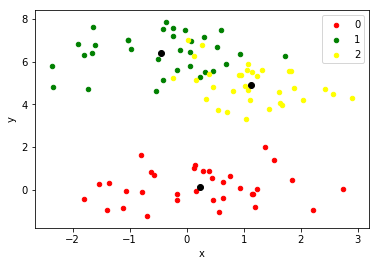

In [62]:
# Make some new blobs
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))

# Calculate Centroids
centroids = get_centroids(df, 'label')
# Plot Clusters
plot_clusters(df, 'label', centroids)

In [63]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

print(labels)

[2 2 2 2 0 1 2 0 2 0 2 1 1 2 1 0 1 1 2 1 0 2 0 1 0 1 2 1 2 1 2 1 2 0 1 1 0
 2 2 2 0 1 0 1 2 2 0 2 0 2 2 2 0 1 0 2 0 1 0 0 0 0 1 0 2 1 0 1 2 1 2 0 2 0
 2 1 2 1 2 0 2 2 1 0 1 2 1 0 0 0 1 0 0 1 1 0 0 0 0 0]


In [64]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
df['clusters'] = new_series.values

df.head()

,x,y,label,clusters
0,-1.109952,-0.871811,0,2
1,0.630630,-0.360386,0,2
2,-0.621665,0.829967,0,2
3,0.389772,0.896154,0,2
4,1.074534,5.894486,2,0


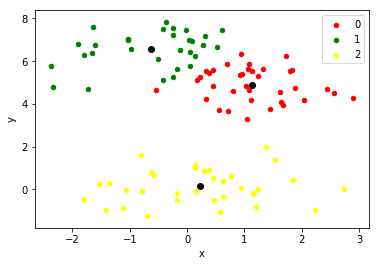

In [65]:
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)

# Further Considerations

## Choosing an appropriate K

## Unlucky Initial Centroids

Unlucky Initial Centroids can 

- result in a poor clustering
- lead to a clustering that doesn't converge

## Computational Complexity

## What is K-means good for?

- ### Mostly Round, linearly-separable blobs.

# No Free Lunch

The no free lunch principle states that the more an algorithm is optimized to solve one specific kind of problem, the worse it gets at solving all other kinds of problems. 

This means that if you want an algorithm that's really good at solving a certain problem (cluster shape for example), it usually lose some of its ability to generalize to other problems. 

### What does this mean for us as data scientists?

1) There are always tradeoffs when selecting from different approaches. Because of this, understanding those tradeoffs and justifying your choice of methodology is just as important as actually doing the work itself.

2) The only way that we can choose one approach over another is to make assumptions about our data. If we don't know anything about the characteristics of our data, then we can't make an informed choice of algorithm. 

Think about how we knew to use Unsupervised vs Supervised learning for the clustering problem, the choice was informed by our data. Does it have labels or not? 

![No Free Lunch](https://cdn-images-1.medium.com/max/1600/1*oNt9G9UpVhtyFLDBwEMf8Q.png)

Density Based Clustering

[DB Scan Animation](https://www.youtube.com/watch?v=h53WMIImUuc)

Hard Clustering: In hard clustering, each data point either belongs to a cluster completely or not. For example, in the above example each customer is put into one group out of the 10 groups.

Soft Clustering: In soft clustering, instead of putting each data point into a separate cluster, a probability or likelihood of that data point to be in those clusters is assigned. For example, from the above scenario each costumer is assigned a probability to be in either of 10 clusters of the retail store.

## Don't Get Overwhelmed! 

Some people spend their entire careers researching new clustering methods and improvements.

## Don't be a perfectionist! 

There are too many techniques to master, you can't learn all of them in 7 months.

## Focus on learning in the context of a problem you want to solve or a project that you are passionate about building


## Additional Resources:

1) [Jason Brownlee - Supervised an Unsupervised Learning](https://machinelearningmastery.com/supervised-and-unsupervised-machine-learning-algorithms/)

2) [The 5 Clustering Algorithms Data Scientists Need to Know](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

[DB-Scan Animation](https://www.youtube.com/watch?v=h53WMIImUuc)